# Introduction

COVID-19, short for "Coronavirus Disease 2019," is a highly contagious respiratory illness caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus was first identified in December 2019 in Wuhan, Hubei province, China, and has since become a global pandemic.

COVID-19 is primarily transmitted through respiratory droplets when an infected person coughs, sneezes, talks, or breathes. It can also spread by touching surfaces or objects contaminated with the virus and then touching the face, particularly the mouth, nose, or eyes.
To control the spread of the virus, various preventive measures have been implemented worldwide, such as wearing masks, practicing physical distancing, regular hand hygiene, and vaccination. COVID-19 vaccines have been developed and approved for emergency use in many countries, offering protection against severe disease and reducing the risk of transmission.
The COVID-19 pandemic has had significant global impacts, including the loss of millions of lives, overburdened healthcare systems, disruptions to economies, travel restrictions, and changes in social behavior. Efforts to manage and mitigate the effects of the pandemic involve ongoing monitoring, testing, contact tracing, and the development of new treatments and interventions.

It is important to stay informed about the latest updates from reputable health authorities and follow their guidelines to help protect yourself and others from COVID-19.

# Load necessary packages

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
from matplotlib import pyplot as plt

In [6]:
import time

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


#  Load Data

In [8]:
covid_data = pd.read_csv('C:/Users/Shivam Sah/Downloads/Covid Dataset.csv',low_memory=False)

In [9]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


# Shape of dataset

In [10]:
covid_data.shape

(5434, 21)

# Printing out a few columns

In [11]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [12]:
covid_data.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


# Description

In [13]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [14]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [15]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() 

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


# Exploratory Data Analysis (EDA)

<AxesSubplot:>

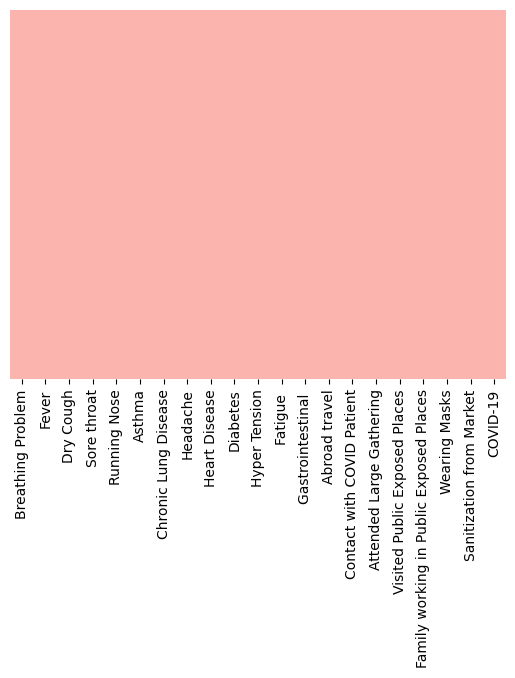

In [16]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

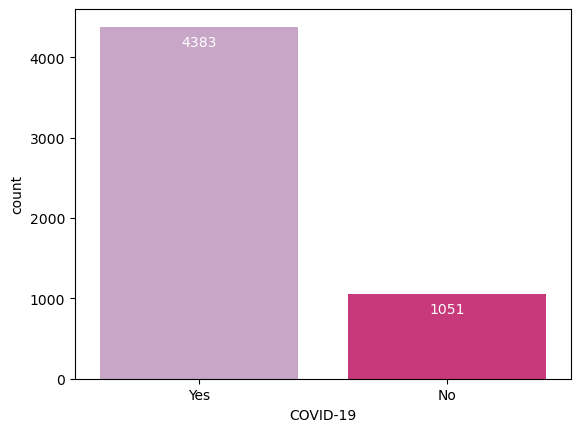

In [17]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

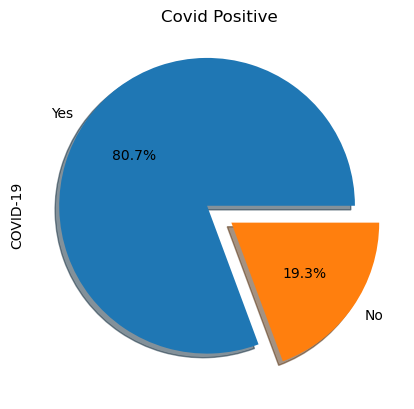

In [18]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

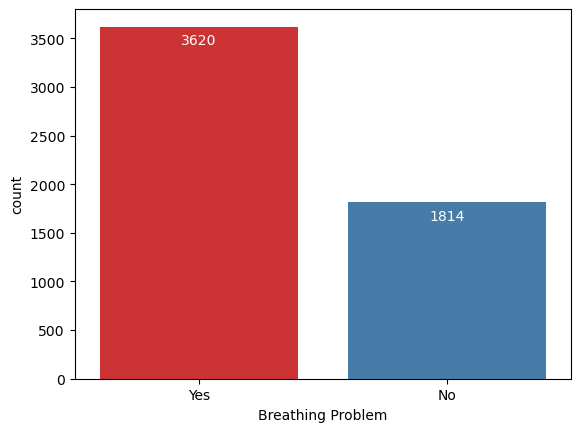

In [19]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

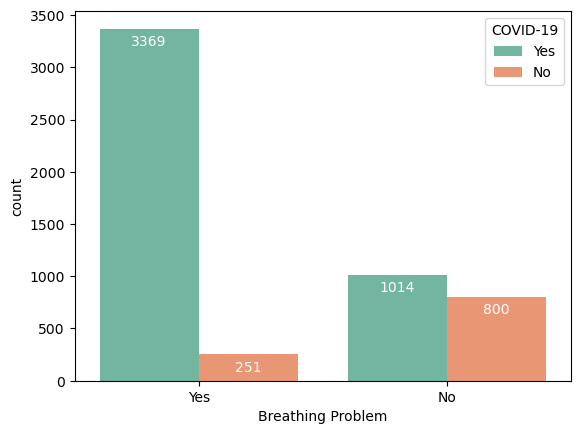

In [20]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

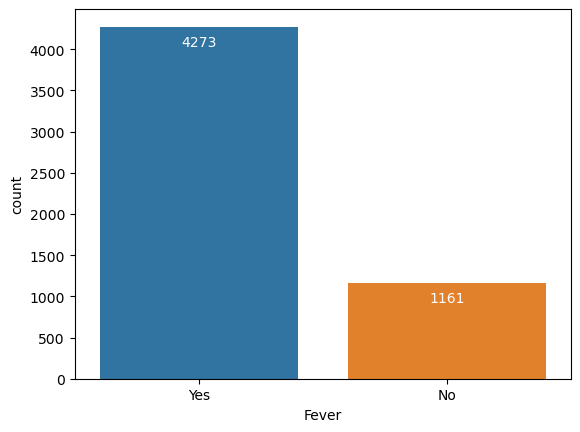

In [21]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

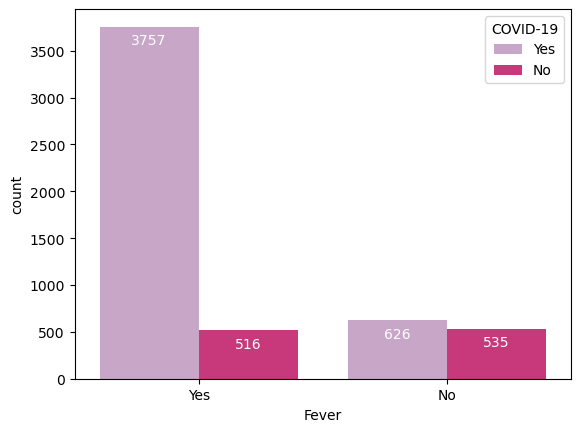

In [22]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

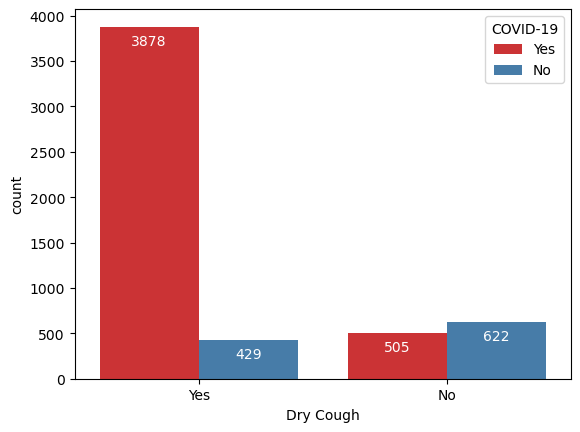

In [23]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

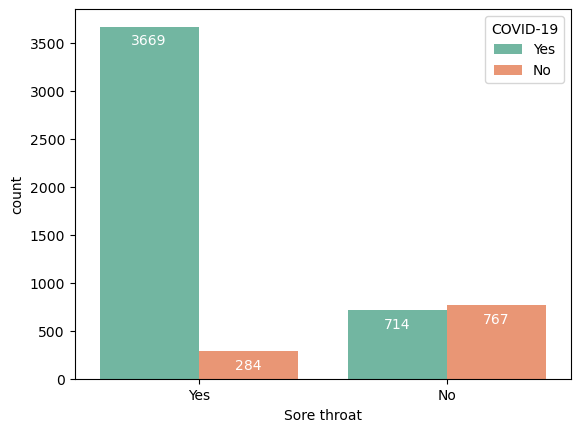

In [24]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

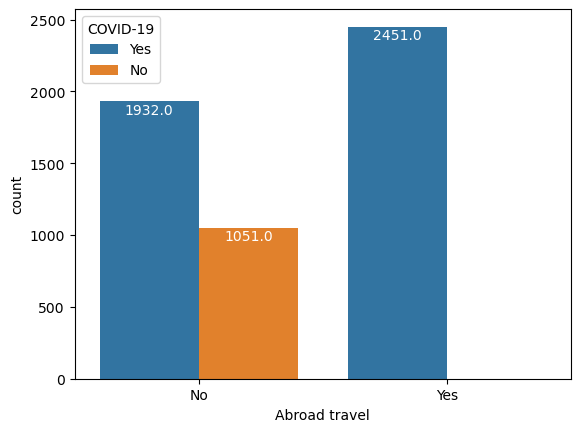

In [25]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

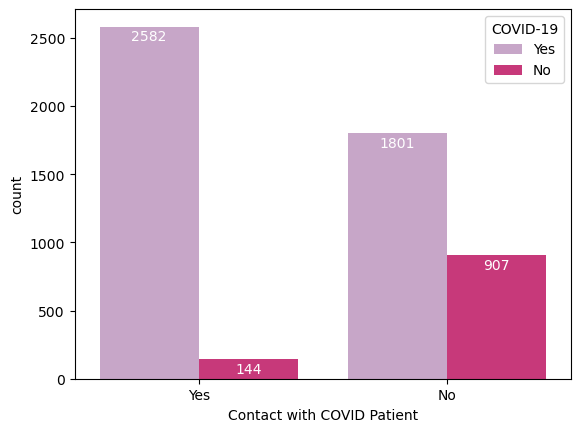

In [26]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

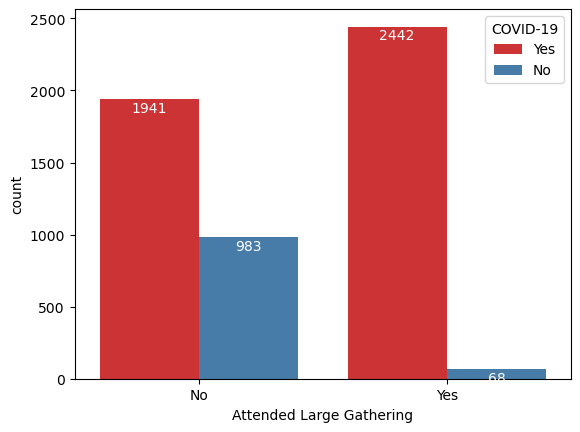

In [27]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [28]:
e=LabelEncoder()

In [29]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [30]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [31]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


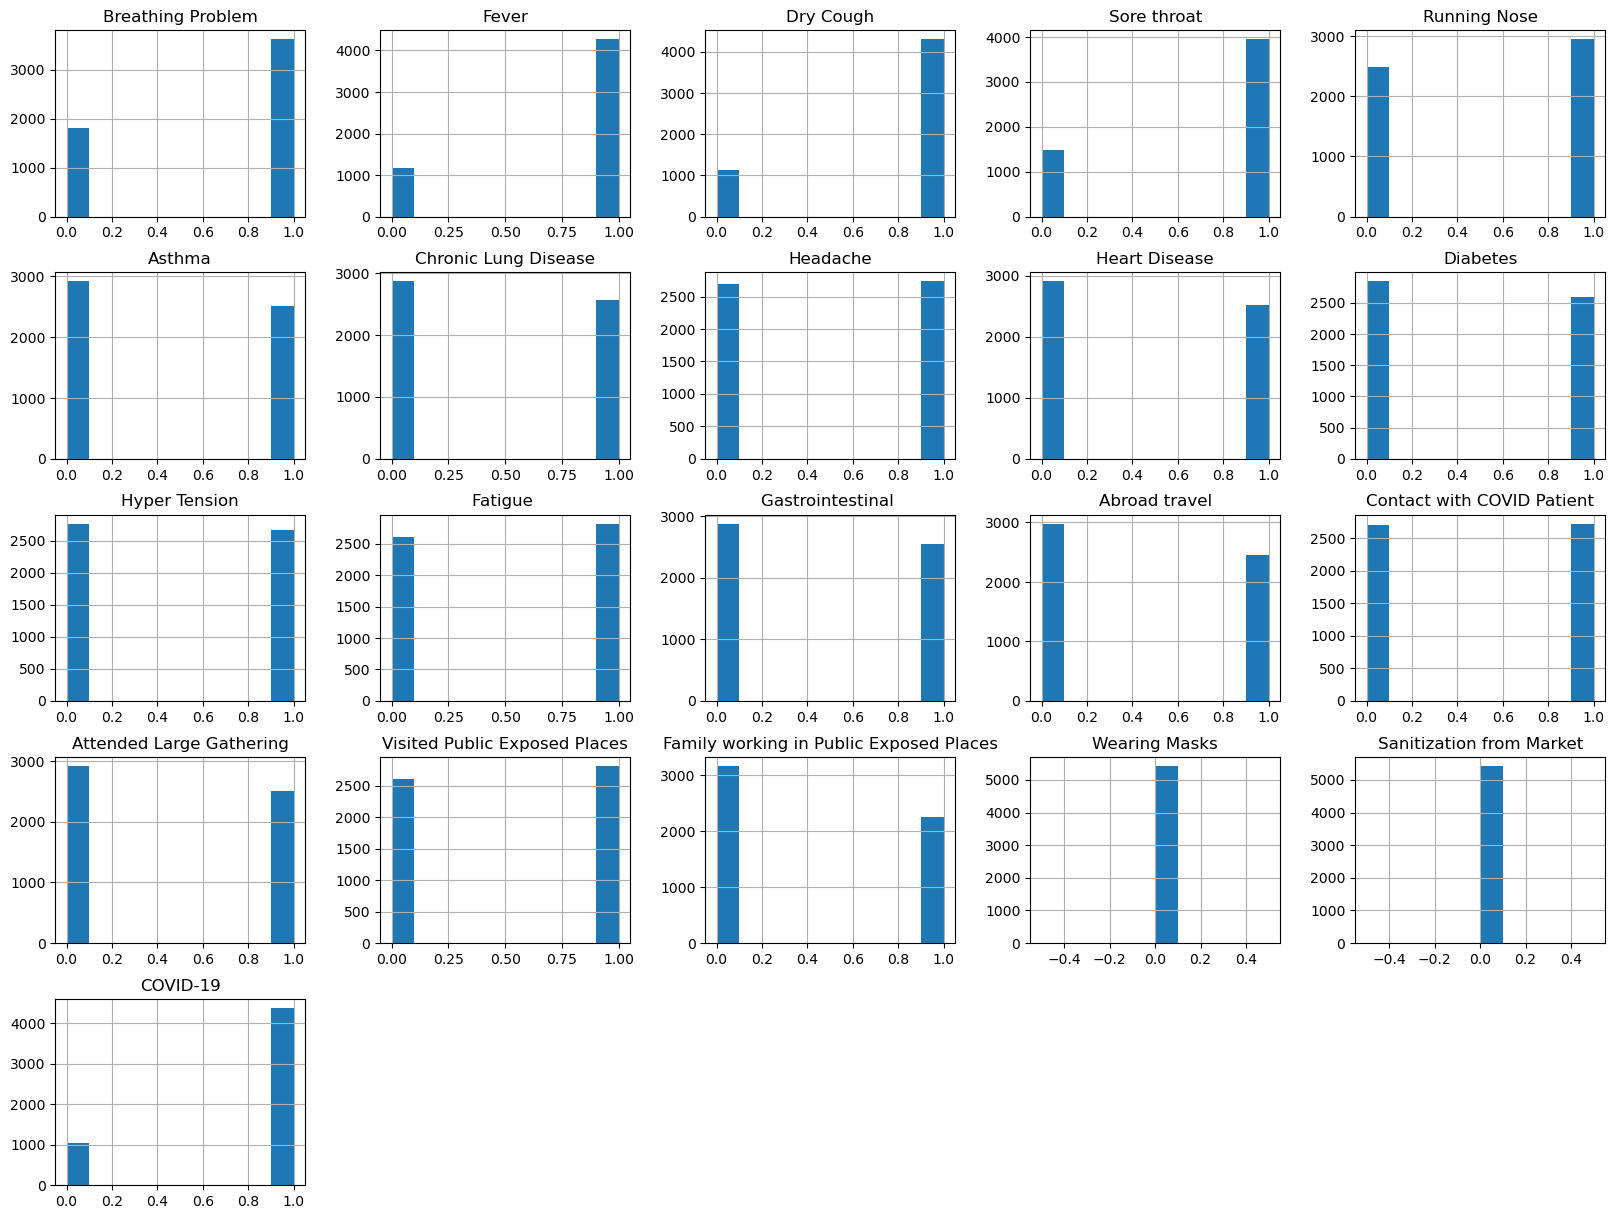

In [32]:
covid_data.hist(figsize=(20,15));

0    5434
Name: Wearing Masks, dtype: int64


<AxesSubplot:xlabel='Wearing Masks', ylabel='count'>

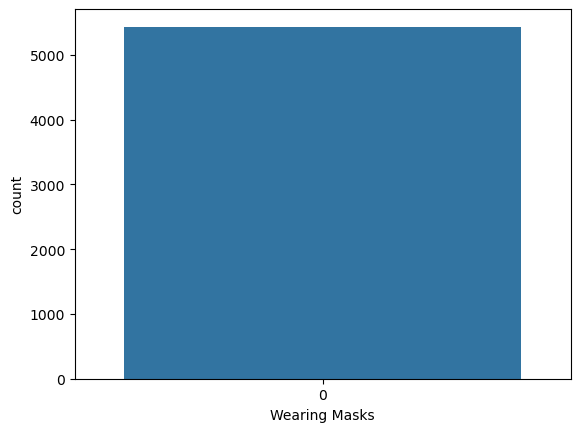

In [33]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

0    5434
Name: Sanitization from Market, dtype: int64


<AxesSubplot:xlabel='Sanitization from Market', ylabel='count'>

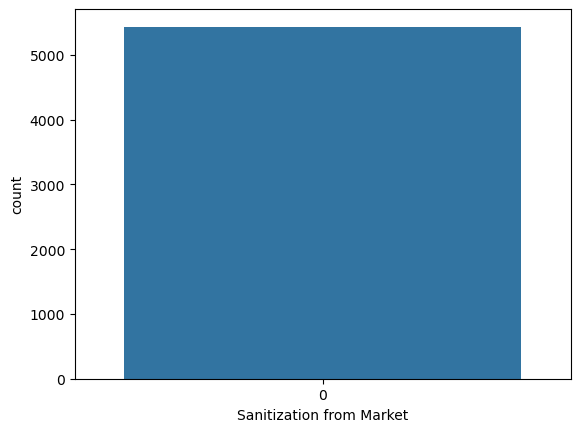

In [34]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [35]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [36]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<AxesSubplot:>

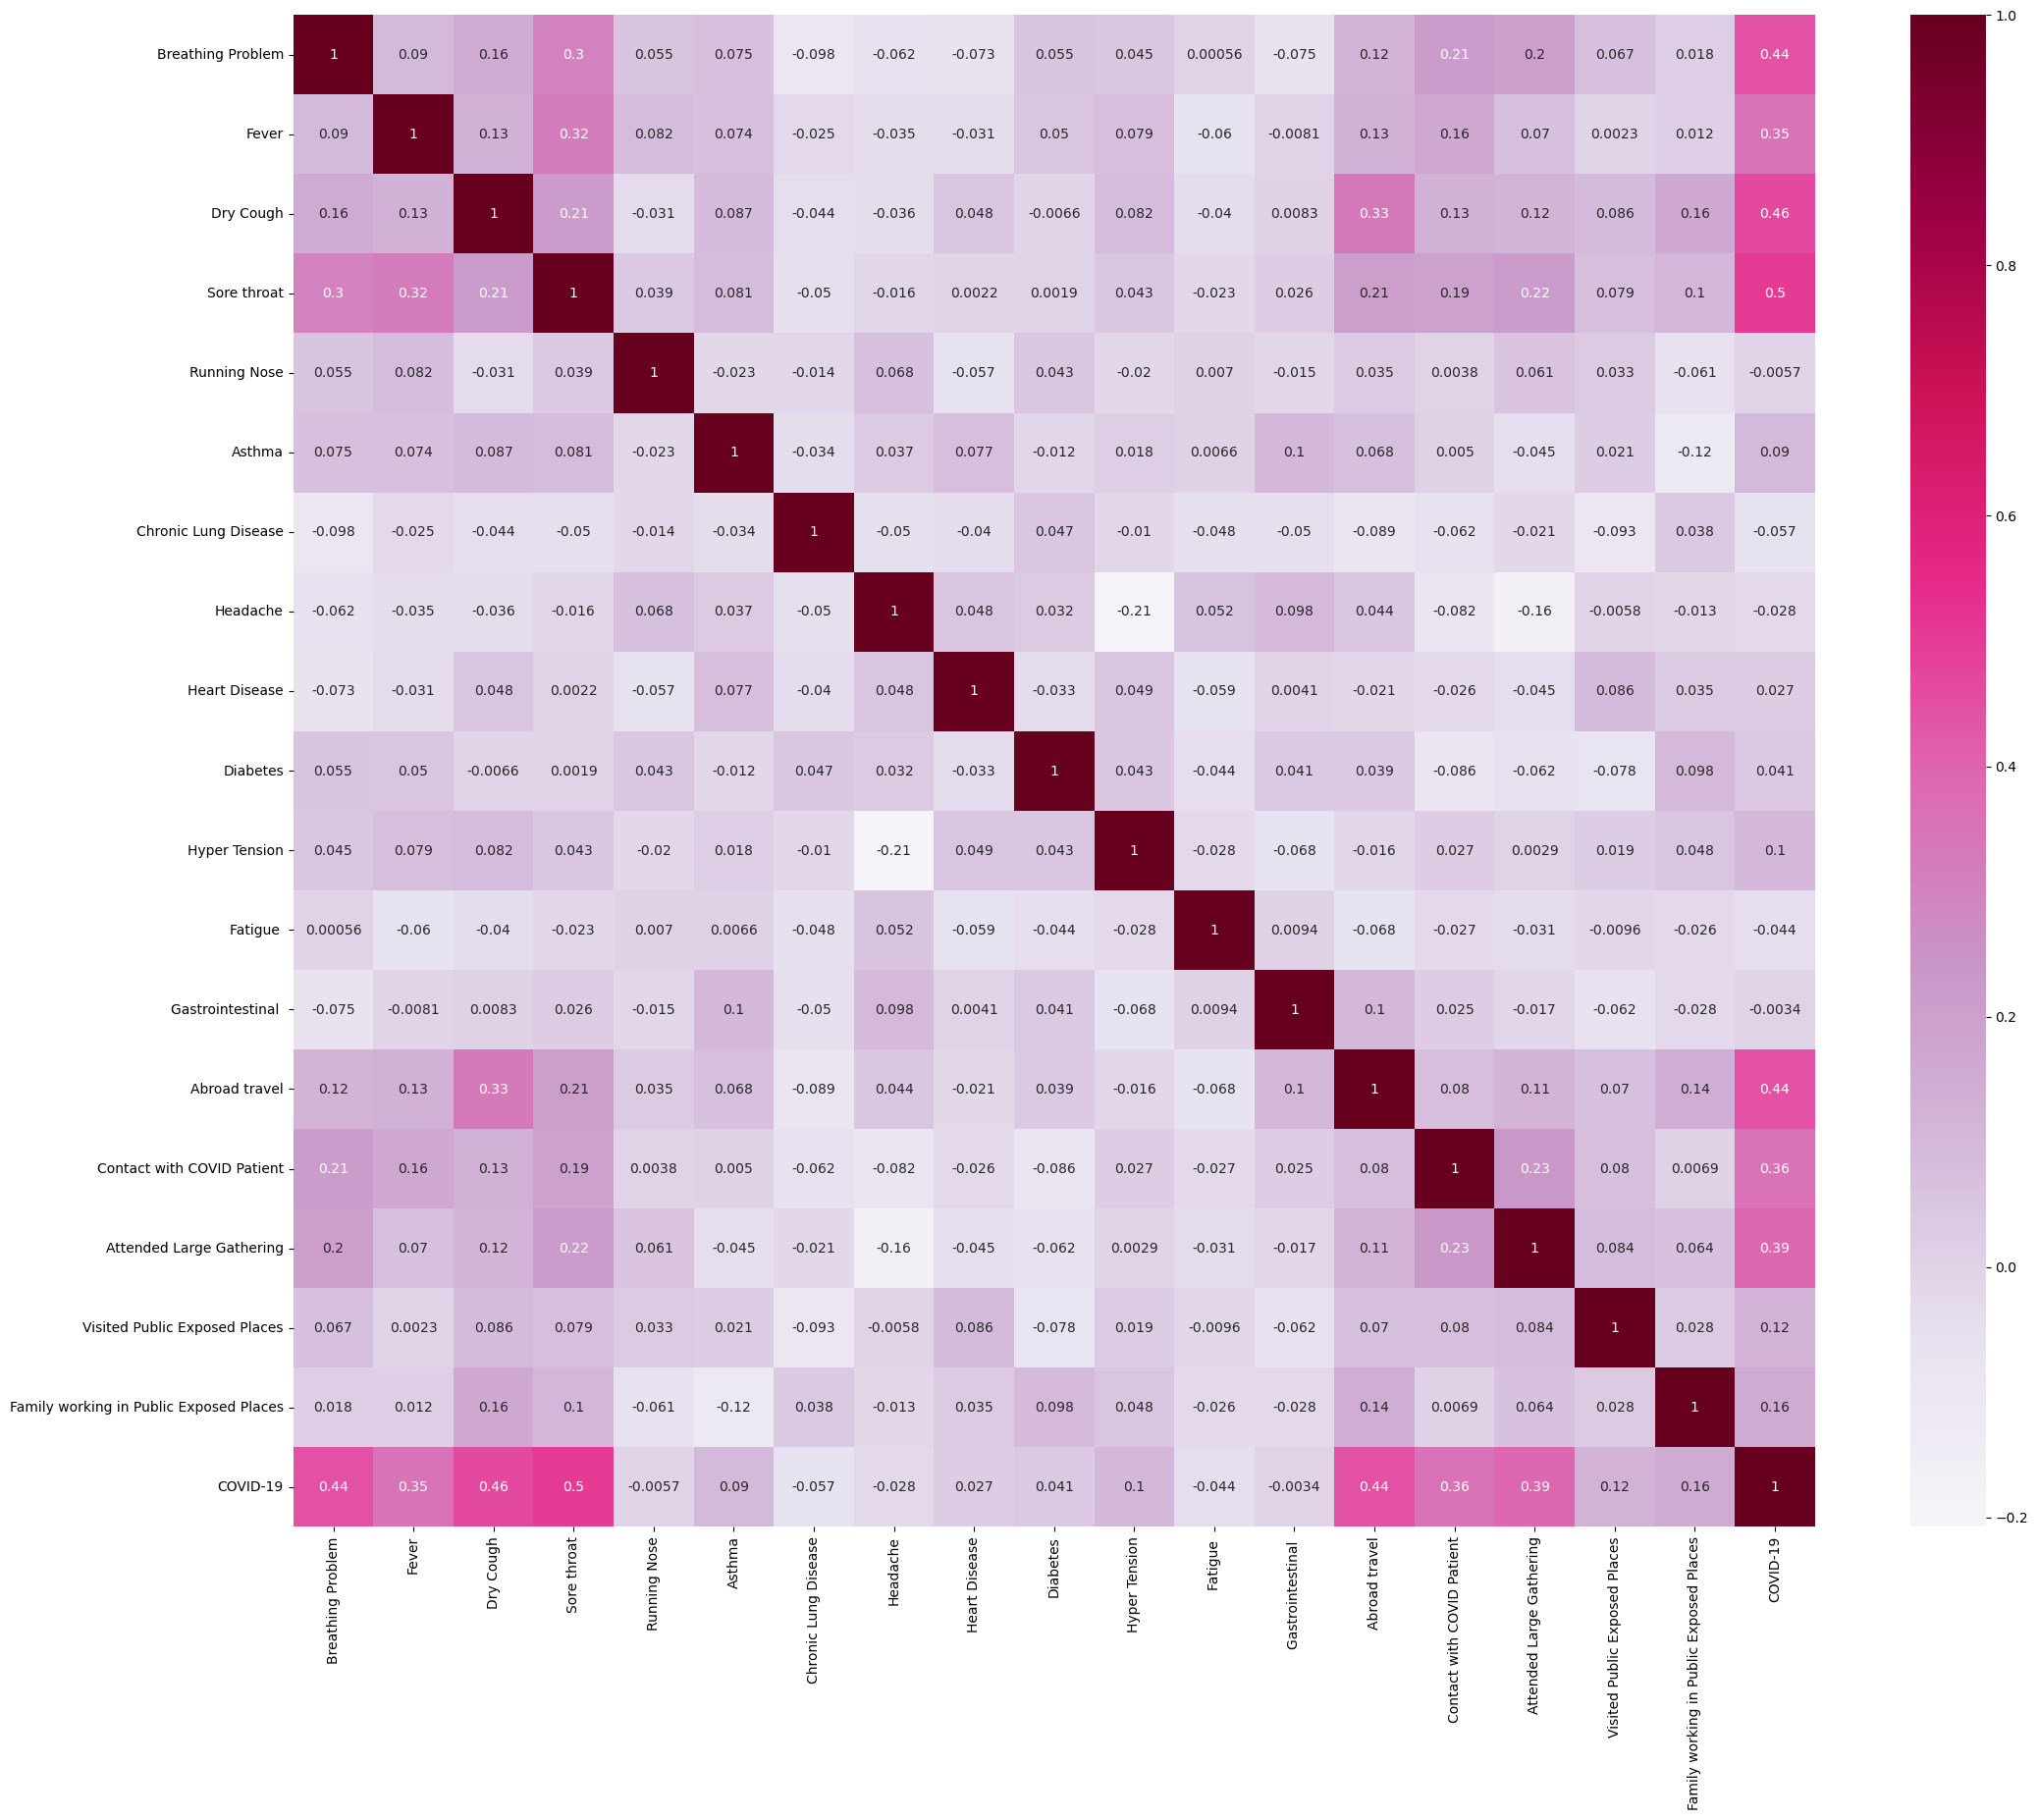

In [45]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

# LOGISTIC REGRESSION

LOGISTIC REGRESSION
ROC_AUC value : 93.23107498945218 % 

Mean Squared Error : 3.035878564857406 %

R2 score is : 80.08627006861634 %

Accuracy Score : 97.03243616287095 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



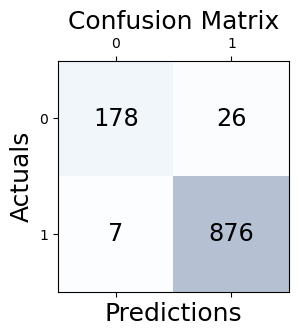

In [53]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION']=end-start

# K-NEAREST NEIGHBOURS

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [59]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 2}
The best score we have achieved is: 0.9809068423210718


K-NEAREST NEIGHBOURS
ROC_AUC value : 97.47213154797593 % 

Mean Squared Error : 2.5758969641214353 %

R2 score is : 83.10350187640175 %

Accuracy Score : 98.3666896710375 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



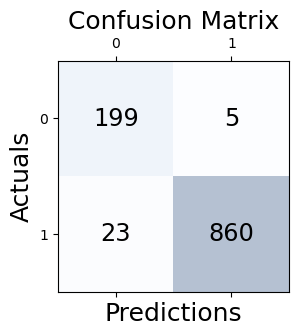

In [60]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')


# RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [66]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 0],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

In [67]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
The best score we have achieved is: 96.61828234329326


RANDOM FOREST TREE
ROC_AUC value : 91.17647058823529 % 

Mean Squared Error : 3.3118675252989878 %

R2 score is : 78.2759309839451 %

Accuracy Score : 96.52634000460087 %

Classification Report :  
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       204
           1       0.96      1.00      0.98       883

    accuracy                           0.97      1087
   macro avg       0.98      0.91      0.94      1087
weighted avg       0.97      0.97      0.97      1087



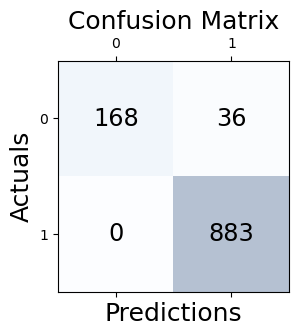

In [68]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')